# Разработка модели МО, которая поможет фермеру молочного хозяйства «Вольный луг» управлять рисками и принимать объективное решение о покупке бурёнок

**Описание проекта**

К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!\
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
1. Первая будет прогнозировать возможный удой коровы (целевой признак `Удой`);
2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак `Вкус молока`).

С помощью модели нужно отобрать коров по двум критериям:
* средний удой за год — не менее 6000 килограммов;
* молоко должно быть вкусным.

**Описание данных**

1. Файл `ferma_main.csv` содержит данные о стаде фермера на текущий момент. 
- `id` — уникальный идентификатор коровы.
- `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
- `ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.
- `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
- `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Жирность,%` — содержание жиров в молоке (в процентах).
- `Белок,%` — содержание белков в молоке (в процентах).
- `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (`вкусно`, `не вкусно`).
- `Возраст` — возраст коровы, бинарный признак (`менее_2_лет`, `более_2_лет`).

Признаки в датасете `ferma_main.csv` можно разделить на группы.
- Характеристики коровы: `id`, `Порода`, `порода папы_быка`, `Возраст`.
- Характеристики корма: `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г`, `СПО (Сахаро-протеиновое соотношение)`.
- Характеристика пастбища: `Тип пастбища`.
- Характеристики молока: `Удой, кг`, `Жирность,%`, `Белок,%`, `Вкус молока`.

Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.

2. Файл `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера.
- `id` — уникальный идентификатор коровы.
- `Имя Папы` — имя папы коровы.

3. Файл `cow_buy.csv` — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Имя_папы` — имя папы коровы.
- `Текущая_жирность,%` — содержание жиров в молоке (в процентах).
- `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).
- `Возраст` — возраст коровы, бинарный признак (`менее_2_лет`, `более_2_лет`).

Данные в файлах `ferma_main.csv` и `cow_buy.csv` похожи, но у датасета `cow_buy.csv` несколько особенностей.
- Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
- Параметры корма `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г` и `СПО (Сахаро-протеиновое соотношение)` отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
- Кроме того, отсутствуют признаки `Удой, кг` и `Вкус молока`. Это целевые признаки, именно их предстоит предсказать!

**План работы**

1. Загрузим и изучим данные
2. Проведём предобработку данных
3. Проведём исследовательский анализ данных
4. Проведём корреляционный анализ признаков в датасете `ferma_main.csv`
5. Обучение модели линейной регрессии
6. Обучение модели логистической регрессии
7. Итоговые выводы

## 1. Загрузим и изучим данные

**Импортируем библиотеки:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, norm, spearmanr
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, recall_score, precision_score

In [2]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
ferma_main.columns = ferma_main.columns.str.replace('_', ' ')
ferma_main.head(10)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


Наблюдаем на некорректность в названиях столбцов. Приведём все названия с заглавной буквы и изменим длинные названия столбцов:

In [3]:
ferma_main.rename(columns = {'ЭКЕ (Энергетическая кормовая единица)':'ЭКЕ', 'СПО (Сахаро-протеиновое соотношение)':'СПО'}, inplace = True )

ferma_main.columns = ferma_main.columns.str.replace('порода папы быка', 'Порода папы быка')
ferma_main.head(10)

,id,"Удой, кг",ЭКЕ,"Сырой протеин, г",СПО,Порода,Тип пастбища,Порода папы быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


In [4]:
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
ferma_dad.columns = ferma_dad.columns.str.replace('_', ' ')
ferma_dad.head(10)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [5]:
ferma_dad.columns = ferma_dad.columns.str.replace('Имя Папы', 'Имя папы')
ferma_dad.head(10)

,id,Имя папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [6]:
cow_buy = pd.read_csv('/datasets/cow_buy_old.csv', sep=';', decimal=',')
cow_buy.columns = cow_buy.columns.str.replace('_', ' ')
cow_buy.head(10)

,Порода,Тип пастбища,порода папы быка,Имя папы,"Текущая жирность,%","Текущий уровень белок,%"
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079


Изменим названия столбцов на более короткие и приведём написание к заглавным буквам:

In [7]:
cow_buy.columns = cow_buy.columns.str.replace('Текущая жирность,%', 'Жирность,%')
cow_buy.columns = cow_buy.columns.str.replace('Текущий уровень белок,%', 'Белок,%')

cow_buy.columns = cow_buy.columns.str.replace('порода папы быка', 'Порода папы быка')
cow_buy.head(10)

,Порода,Тип пастбища,Порода папы быка,Имя папы,"Жирность,%","Белок,%"
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079


**Вывод**:
Провели анализ полученных данных. Внесли корректировки в названиях столбцов.

##  2. Проведём предобработку данных

### Данные `ferma_main`

In [8]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                634 non-null    int64  
 1   Удой, кг          634 non-null    int64  
 2   ЭКЕ               634 non-null    float64
 3   Сырой протеин, г  634 non-null    int64  
 4   СПО               634 non-null    float64
 5   Порода            634 non-null    object 
 6   Тип пастбища      634 non-null    object 
 7   Порода папы быка  634 non-null    object 
 8   Жирность,%        634 non-null    float64
 9   Белок,%           634 non-null    float64
 10  Вкус молока       634 non-null    object 
 11  Возраст           634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [9]:
ferma_main.isna().sum()

id                  0
Удой, кг            0
ЭКЕ                 0
Сырой протеин, г    0
СПО                 0
Порода              0
Тип пастбища        0
Порода папы быка    0
Жирность,%          0
Белок,%             0
Вкус молока         0
Возраст             0
dtype: int64

In [10]:
ferma_main.duplicated().sum()

5

Имеются 5 дубликатов, удаляем их:

In [11]:
ferma_main[ferma_main.duplicated()]
ferma_main.drop_duplicates(inplace=True)
ferma_main.duplicated().sum()

0

In [12]:
ferma_main['Порода'] = ferma_main['Порода'].replace('РефлешнСоверинг','Рефлешн Соверинг')
print(*ferma_main['Порода'].unique(), sep="\n")

Вис Бик Айдиал
Рефлешн Соверинг


In [13]:
print(*ferma_main['Тип пастбища'].unique(), sep="\n")

Равнинное
Равнинные
Холмистое


In [14]:
ferma_main['Тип пастбища'] = ferma_main['Тип пастбища'].replace('Равнинные','Равнинное')
print(*ferma_main['Тип пастбища'].unique(), sep="\n")

Равнинное
Холмистое


In [15]:
print(*ferma_main['Порода папы быка'].unique(), sep="\n")

Айдиал
Соверин
Айдиалл


In [16]:
ferma_main['Порода папы быка'] = ferma_main['Порода папы быка'].replace('Айдиалл','Айдиал')
print(*ferma_main['Порода папы быка'].unique(), sep="\n")

Айдиал
Соверин


In [17]:
ferma_main['Возраст'] = ferma_main['Возраст'].replace('более_2_лет','Более 2 лет')
ferma_main['Возраст'] = ferma_main['Возраст'].replace('менее_2_лет','Менее 2 лет')
print(*ferma_main['Возраст'].unique(), sep="\n")

Более 2 лет
Менее 2 лет


### Данные `ferma_dad`

In [18]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [19]:
ferma_dad.isna().sum()

id          0
Имя папы    0
dtype: int64

In [20]:
ferma_dad.duplicated().sum()

0

In [21]:
print(*ferma_dad['Имя папы'].unique(), sep="\n")

Буйный
Соловчик
Барин
Геркулес


### Данные `cow_buy`

In [22]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Порода            20 non-null     object 
 1   Тип пастбища      20 non-null     object 
 2   Порода папы быка  20 non-null     object 
 3   Имя папы          20 non-null     object 
 4   Жирность,%        20 non-null     float64
 5   Белок,%           20 non-null     float64
dtypes: float64(2), object(4)
memory usage: 1.1+ KB


In [23]:
cow_buy.isna().sum()

Порода              0
Тип пастбища        0
Порода папы быка    0
Имя папы            0
Жирность,%          0
Белок,%             0
dtype: int64

In [24]:
cow_buy.duplicated().sum()

4

In [25]:
cow_buy[cow_buy.duplicated()]

,Порода,Тип пастбища,Порода папы быка,Имя папы,"Жирность,%","Белок,%"
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074


Наблюдаем наличие буренок в ассоциации пастбищ "ЭкоФерма" с одинаковыми характеристиками. Оставляем их.

In [26]:
cow_buy['Тип пастбища'] = cow_buy['Тип пастбища'].replace('равнинное','Равнинное')
cow_buy['Тип пастбища'] = cow_buy['Тип пастбища'].replace('холмистое','Холмистое')
print(*cow_buy['Тип пастбища'].unique(), sep="\n")

Холмистое
Равнинное


In [27]:
print(*cow_buy['Порода папы быка'].unique(), sep="\n")

Айдиал
Соверин


In [28]:
print(*cow_buy['Имя папы'].unique(), sep="\n")

Геркулес
Буйный
Барин
Соловчик


In [29]:
cow_buy['Порода'] = cow_buy['Порода'].replace('РефлешнСоверинг','Рефлешн Соверинг')
display(cow_buy)

,Порода,Тип пастбища,Порода папы быка,Имя папы,"Жирность,%","Белок,%"
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074
5,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.63,3.053
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079
8,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079


In [30]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Порода            20 non-null     object 
 1   Тип пастбища      20 non-null     object 
 2   Порода папы быка  20 non-null     object 
 3   Имя папы          20 non-null     object 
 4   Жирность,%        20 non-null     float64
 5   Белок,%           20 non-null     float64
dtypes: float64(2), object(4)
memory usage: 1.1+ KB


**Вывод:** исправлены названиях в полученных данных, удалены дубликаты. Пропуски в данных не наблюдаем.Проверели корректность типов данных.

## Проведём исследовательский анализ данных

Проведем статистический анализ признаков и построим соответствующие графики:

In [31]:
ferma_main.describe()

,id,"Удой, кг",ЭКЕ,"Сырой протеин, г",СПО,"Жирность,%","Белок,%"
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [32]:
ferma_dad.describe()

,id
count,629.00000
mean,315.00000
std,181.72094
min,1.00000
25%,158.00000
50%,315.00000
75%,472.00000
max,629.00000


In [33]:
cow_buy.describe()

,"Жирность,%","Белок,%"
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


In [34]:
cow_buy.columns

Index(['Порода', 'Тип пастбища', 'Порода папы быка', 'Имя папы', 'Жирность,%',
       'Белок,%'],
      dtype='object')

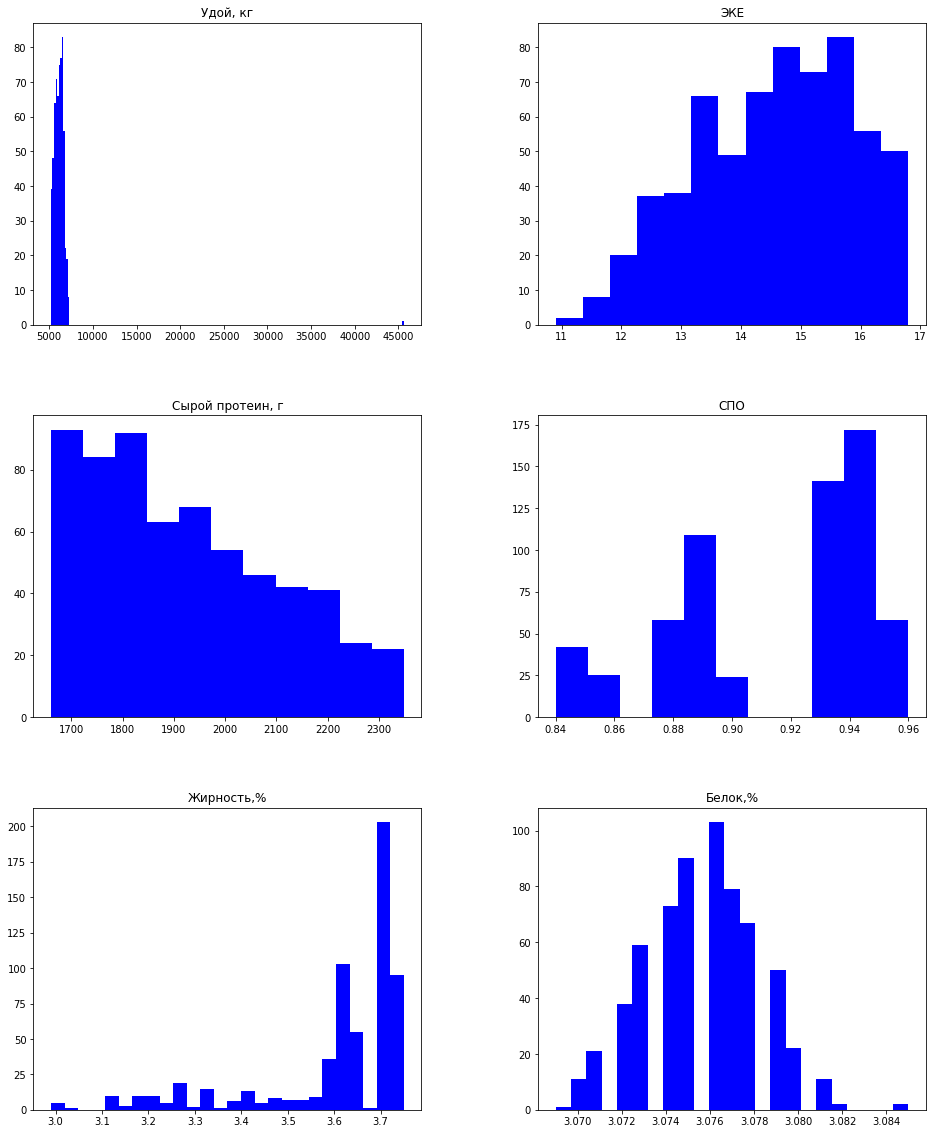

In [35]:
ferma_main[ferma_main.columns[ferma_main.columns != 'id']].hist(figsize=(16, 20), grid= False, color = 'blue', bins='auto');

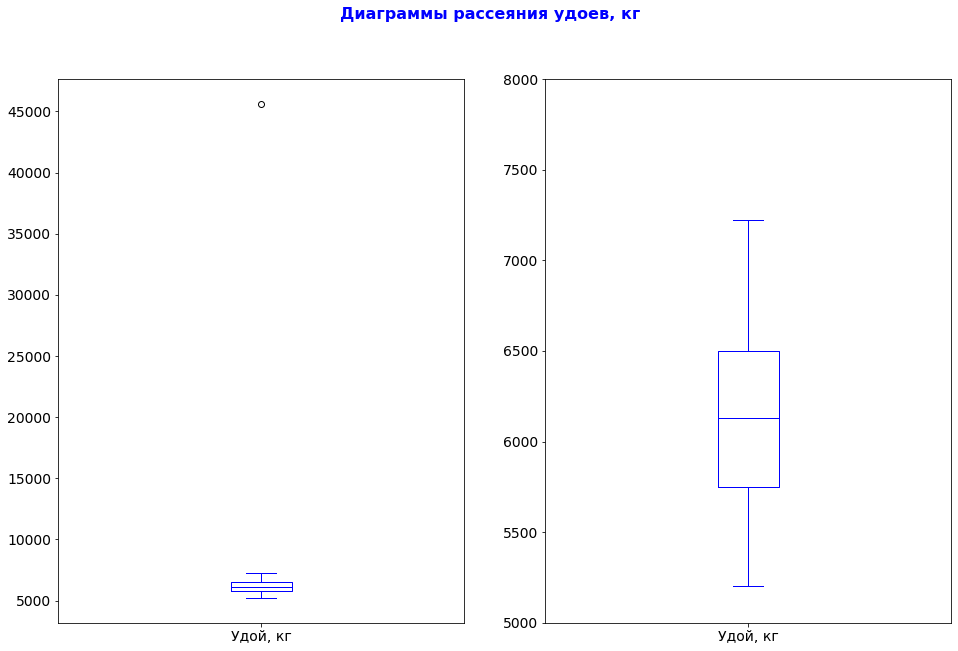

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(16, 10))
ferma_main.boxplot(column=['Удой, кг'], grid= False, fontsize=14, color='blue', ax=axes[0])

ferma_main.boxplot(column=['Удой, кг'], grid= False, fontsize=14, color='blue', ax=axes[1])
axes[1].set_ylim(5000, 8000)

plt.suptitle(f'Диаграммы рассеяния удоев, кг', fontsize=16, fontweight="bold", color='blue')
plt.show()

In [37]:
ferma_main[ferma_main['Удой, кг'] > 8000]

,id,"Удой, кг",ЭКЕ,"Сырой протеин, г",СПО,Порода,Тип пастбища,Порода папы быка,"Жирность,%","Белок,%",Вкус молока,Возраст
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.076,вкусно,Более 2 лет


In [38]:
ferma_main = ferma_main[ferma_main['Удой, кг'] < 8000]
ferma_main.describe()

,id,"Удой, кг",ЭКЕ,"Сырой протеин, г",СПО,"Жирность,%","Белок,%"
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,315.474522,6125.968153,14.548726,1923.759554,0.913089,3.604268,3.075670
std,181.475367,475.857053,1.301777,182.832816,0.032221,0.168093,0.002551
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.750000,5749.750000,13.500000,1771.750000,0.890000,3.590000,3.074000
50%,315.500000,6132.500000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.250000,6501.000000,15.600000,2062.250000,0.940000,3.720000,3.077000
max,629.000000,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Исследование показало наличие выбросов в значениях удоев. Аномалию удаляем:

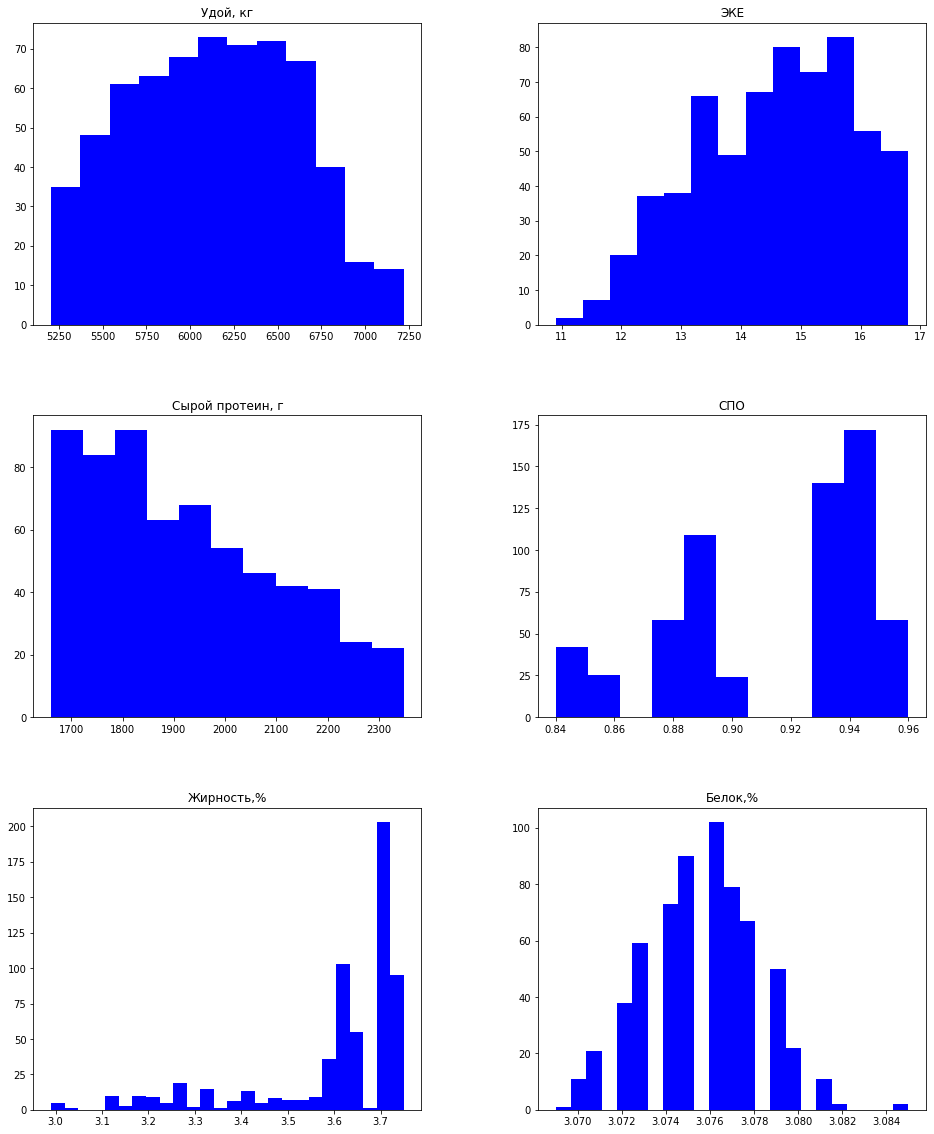

In [39]:
ferma_main[ferma_main.columns[ferma_main.columns != 'id']].hist(figsize=(16, 20), grid= False, color = 'blue', bins='auto');

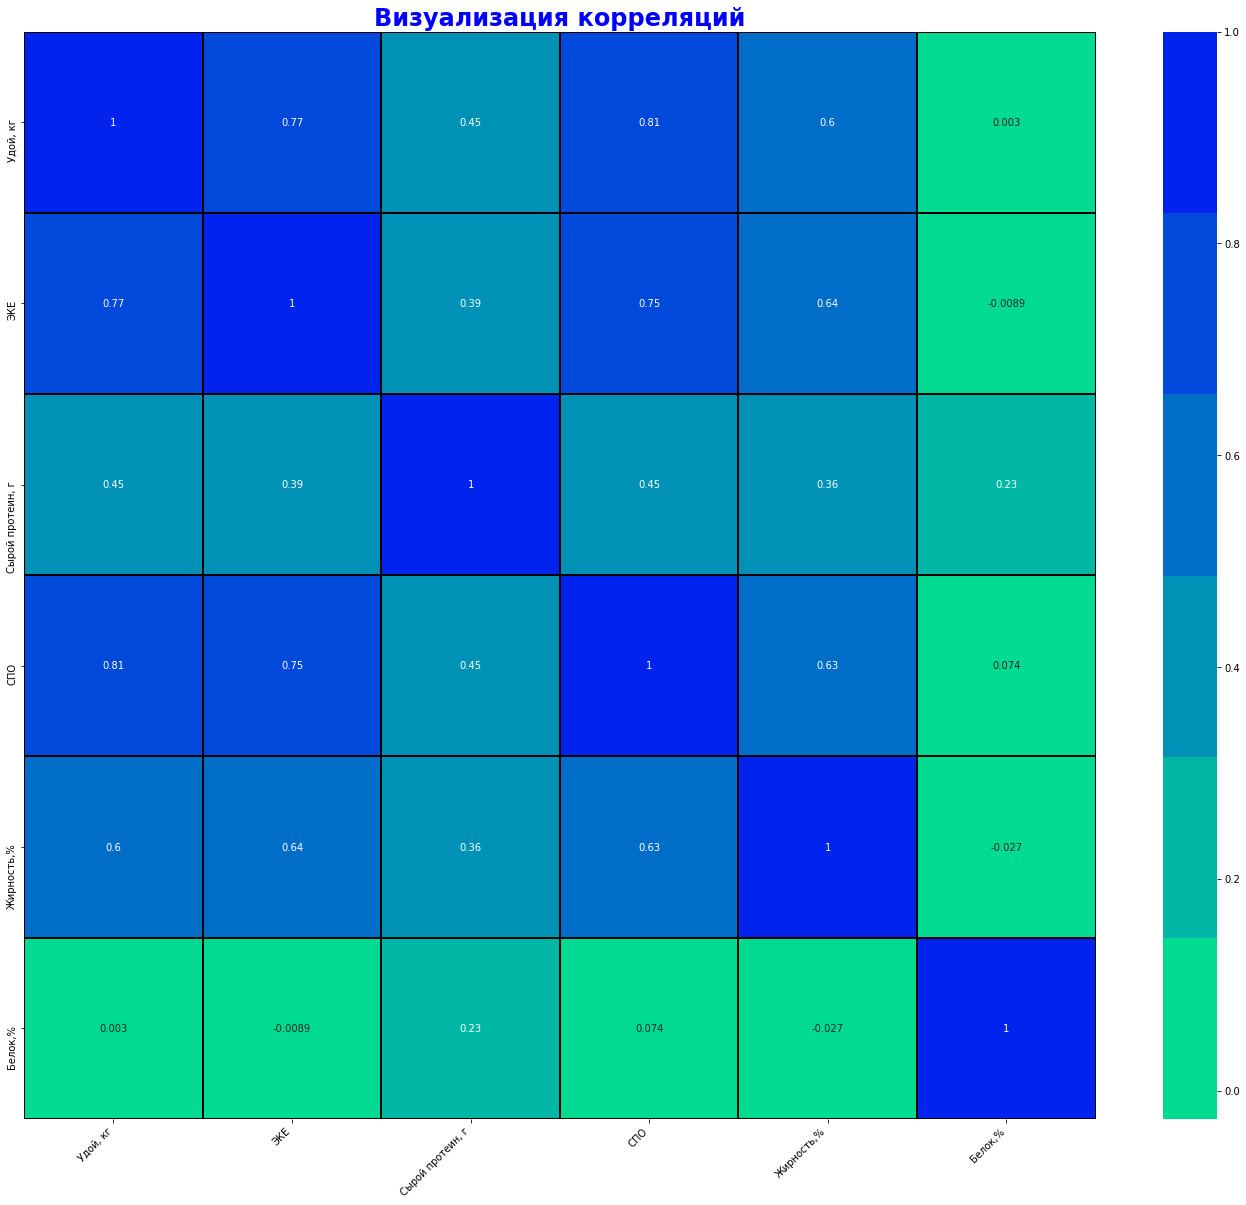

In [40]:
plt.figure(figsize=(24,20))
colormap = sns.color_palette("winter_r")
chart = sns.heatmap(ferma_main[ferma_main.columns[ferma_main.columns != 'id']].corr(), annot=True, 
            cmap=colormap, linewidths=1, linecolor='black')
plt.title('Визуализация корреляций', fontsize=24, fontweight="bold", color='blue') 
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

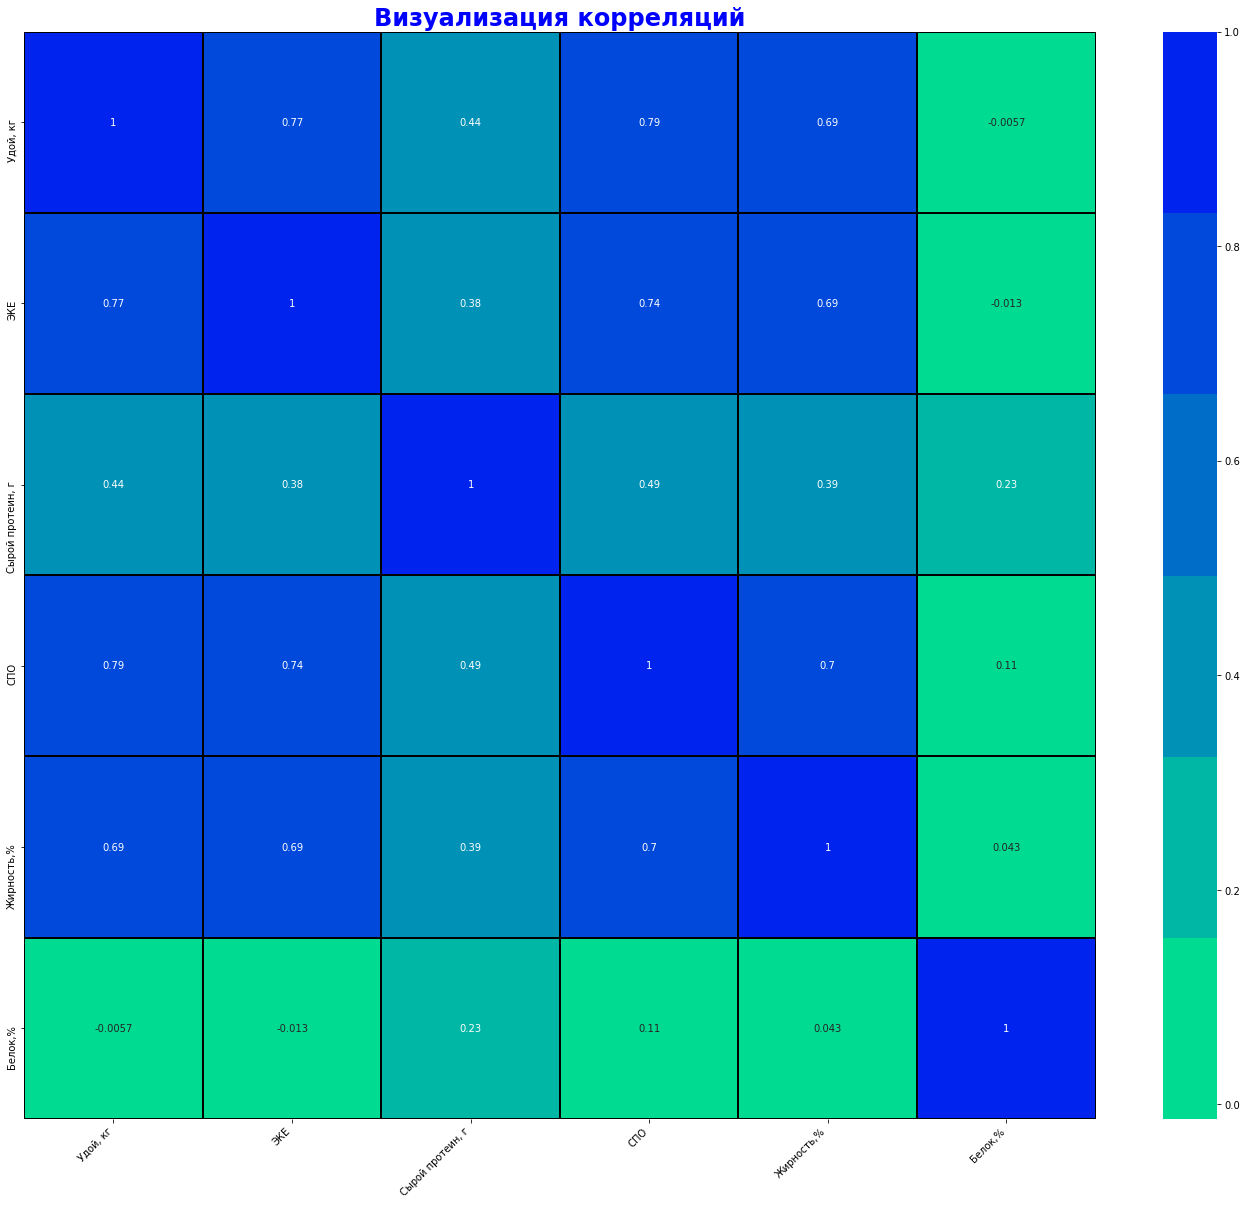

In [41]:
plt.figure(figsize=(24,20))
colormap = sns.color_palette("winter_r")
chart = sns.heatmap(ferma_main[ferma_main.columns[ferma_main.columns != 'id']].corr(method = 'spearman'), annot=True, 
            cmap=colormap, linewidths=1, linecolor='black')
plt.title('Визуализация корреляций', fontsize=24, fontweight="bold", color='blue') 
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [42]:
def ferma_diagram(a, b, c, d, e):
    all = len(a)
    ferma_ratio = a.groupby(b).size()/all
    ferma_ratio_sort = ferma_ratio.sort_values()
    schedule = ferma_ratio_sort.plot(kind='barh', color='darkblue', figsize=(10,6))
    plt.title(f'{c}', fontsize=14, fontweight="bold", color='blue')
    plt.xlabel(f'{d}', fontsize=14, fontweight="bold", color='blue')
    plt.ylabel(f'{e}', fontsize=14, fontweight="bold", color='blue')
    
    percent = dict(ferma_ratio_sort)
    row = 0
    i = 0
    for row in percent:
        schedule.text(percent[row]-0.09, i, str(round(percent[row]*100, 1)) + '%',
                      fontsize = 'large', fontweight='bold', color='white')
        i += 1

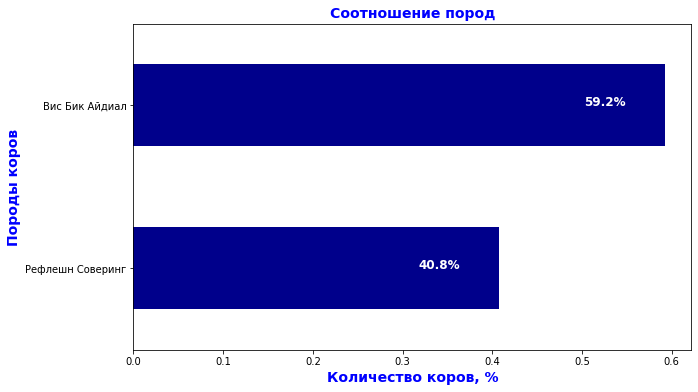

In [43]:
a=ferma_main
b='Порода'
c='Соотношение пород'
d='Количество коров, %'
e='Породы коров'
ferma_diagram(a, b, c, d, e)

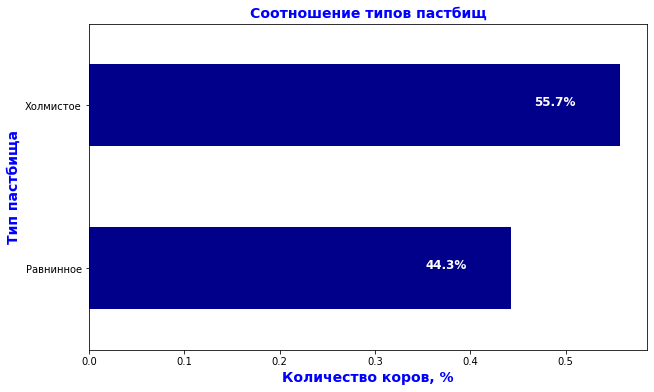

In [44]:
a=ferma_main
b='Тип пастбища'
c='Соотношение типов пастбищ'
d='Количество коров, %'
e='Тип пастбища'
ferma_diagram(a, b, c, d, e)

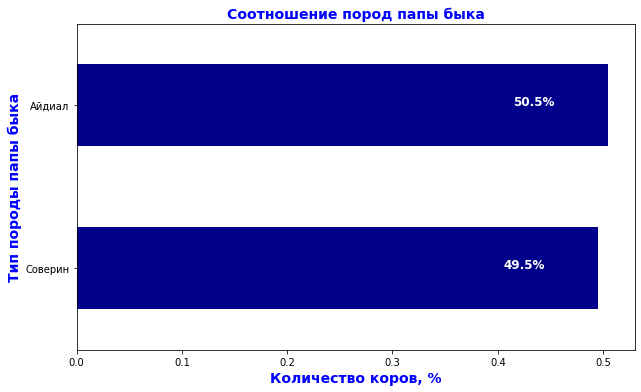

In [45]:
a=ferma_main
b='Порода папы быка'
c='Соотношение пород папы быка'
d='Количество коров, %'
e='Тип породы папы быка'
ferma_diagram(a, b, c, d, e)

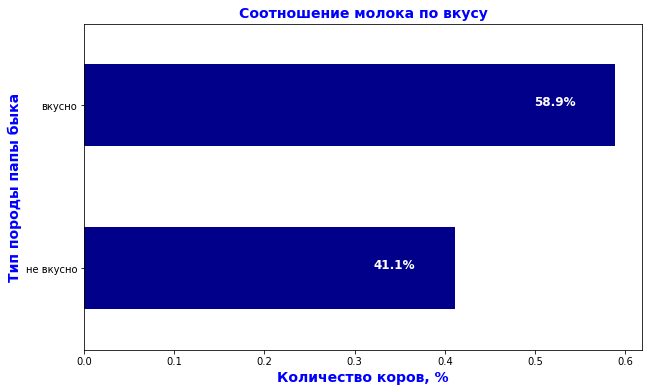

In [46]:
a=ferma_main
b='Вкус молока'
c='Соотношение молока по вкусу'
d='Количество коров, %'
e='Тип породы папы быка'
ferma_diagram(a, b, c, d, e)

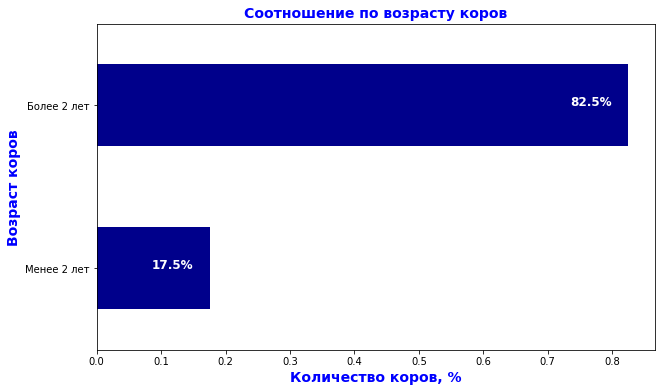

In [47]:
a=ferma_main
b='Возраст'
c='Соотношение по возрасту коров'
d='Количество коров, %'
e='Возраст коров'
ferma_diagram(a, b, c, d, e)

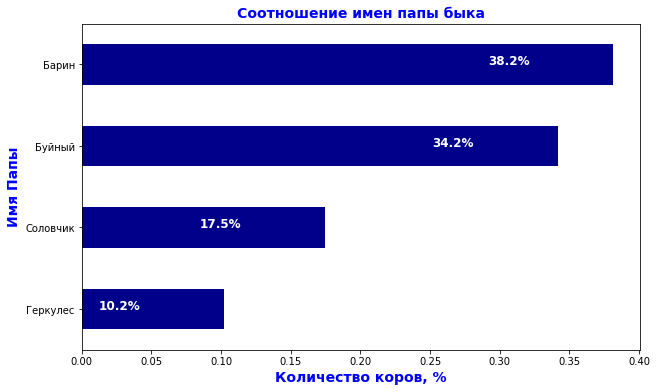

In [48]:
a=ferma_dad
b='Имя папы'
c='Соотношение имен папы быка'
d='Количество коров, %'
e='Имя Папы'
ferma_diagram(a, b, c, d, e)

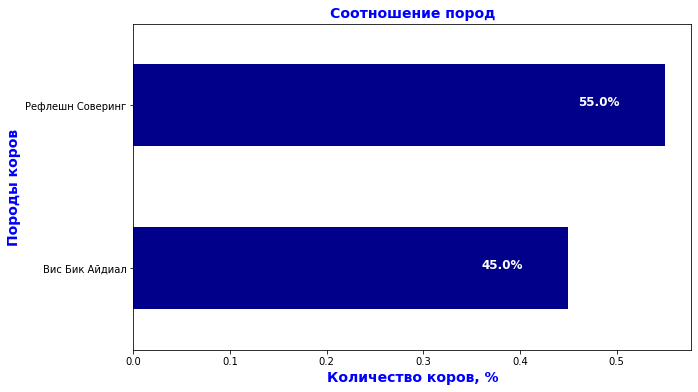

In [49]:
a=cow_buy
b='Порода'
c='Соотношение пород'
d='Количество коров, %'
e='Породы коров'
ferma_diagram(a, b, c, d, e)

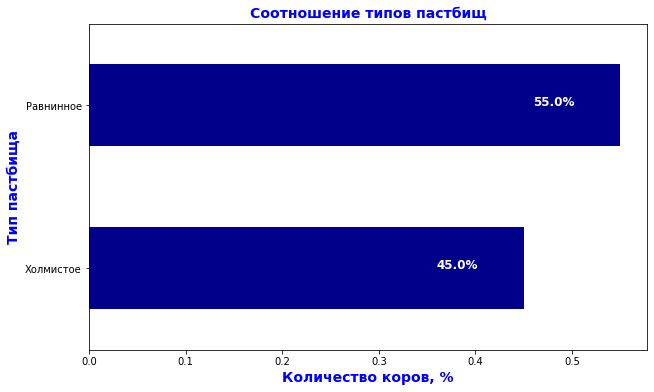

In [50]:
a=cow_buy
b='Тип пастбища'
c='Соотношение типов пастбищ'
d='Количество коров, %'
e='Тип пастбища'
ferma_diagram(a, b, c, d, e)

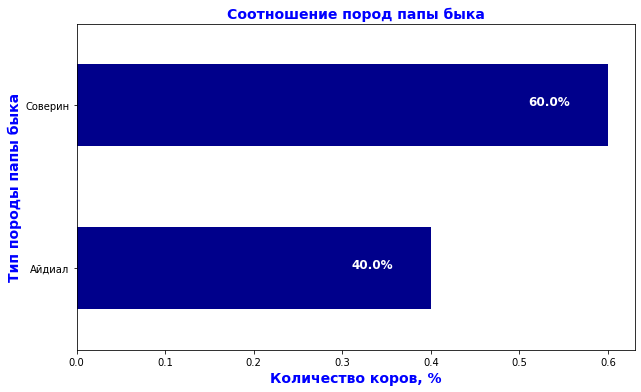

In [51]:
a=cow_buy
b='Порода папы быка'
c='Соотношение пород папы быка'
d='Количество коров, %'
e='Тип породы папы быка'
ferma_diagram(a, b, c, d, e)

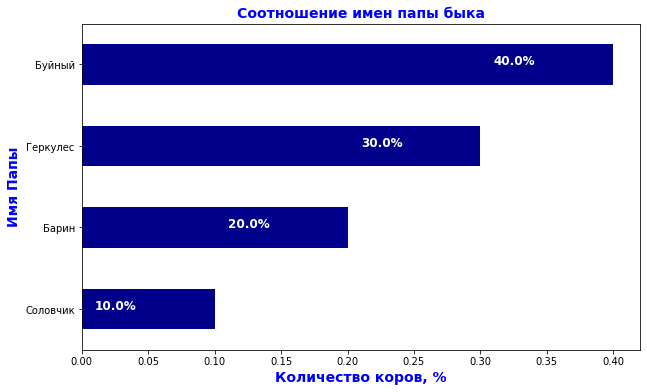

In [52]:
a=cow_buy
b='Имя папы'
c='Соотношение имен папы быка'
d='Количество коров, %'
e='Имя Папы'
ferma_diagram(a, b, c, d, e)

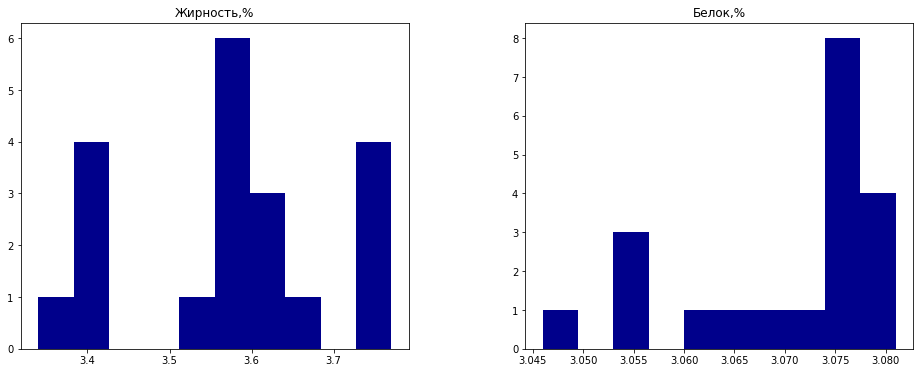

In [53]:
cow_buy[cow_buy.columns[cow_buy.columns != 'id']].hist(figsize=(16, 6), grid= False, color = 'darkblue');

Провели визуализацию данных, обнаружили выбросы и внесли исправления

## Проведём корреляционный анализ признаков в датасете `ferma_main.csv`

In [54]:
def corr_Pearson(a, b, c):

    a.plot(kind='scatter', x=b, y=c, ec='darkblue')
    corr1 = round(a[c].corr(a[b]),3)
    plt.xlabel(f'{b}\n\nКоэффициент корреляции Пирсона = {corr1}', fontsize=14, fontweight="bold", color='darkblue')
    plt.ylabel(f'{c}', fontsize=14, fontweight="bold", color='darkblue')
    plt.suptitle(f'Диаграмма рассеяния между\n {b} и {c}', fontsize=14, fontweight="bold", color='darkblue')

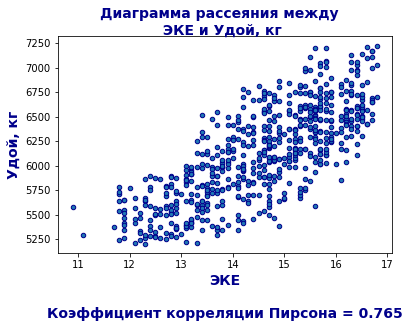

In [55]:
a=ferma_main
b='ЭКЕ'
c='Удой, кг'
corr_Pearson(a, b, c)

In [56]:
def corr_Spearman(a, b, c):

    a.plot(kind='scatter', x=b, y=c, ec='darkblue')
    corr_spearman, a_corr_spearman = spearmanr(a[b], a[c])
    plt.xlabel(f'{b}\n\nКоэффициент корреляции Спирмена = {round(corr_spearman,3)}\n\nзначение p = {a_corr_spearman}', 
               fontsize=14, fontweight="bold", color='darkblue')
    plt.ylabel(f'{c}', fontsize=14, fontweight="bold", color='darkblue')
    plt.suptitle(f'Диаграмма рассеяния между\n {b} и {c}', fontsize=14, fontweight="bold", color='darkblue')

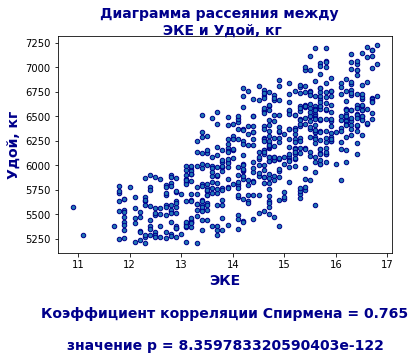

In [57]:
a=ferma_main
b='ЭКЕ'
c='Удой, кг'
corr_Spearman(a, b, c)

Исследование показало высокую линейную связь между `ЭКЕ` и `Удой`

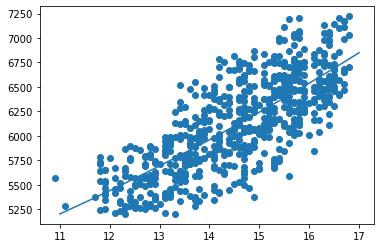

R2 LinearRegression = 0.5861197607237092


In [58]:
model = np.poly1d(np.polyfit(ferma_main['ЭКЕ'], 
                             ferma_main['Удой, кг'], 2)) 
  
polyline = np.linspace(11, 17, 20) 
plt.scatter(ferma_main['ЭКЕ'], ferma_main['Удой, кг']) 
plt.plot(polyline, model(polyline)) 
plt.show() 

r2 = r2_score(ferma_main['Удой, кг'], model(ferma_main['ЭКЕ']))
print("R2 LinearRegression =", r2)

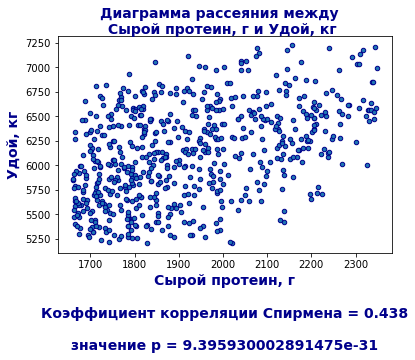

In [59]:
a=ferma_main
b='Сырой протеин, г'
c='Удой, кг'
corr_Spearman(a, b, c)

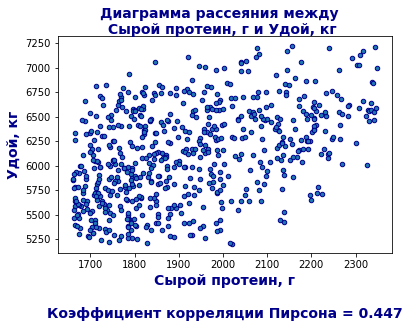

In [60]:
a=ferma_main
b='Сырой протеин, г'
c='Удой, кг'
corr_Pearson(a, b, c)

Исследование показало слабую линейную связь между `Сырой протеин` и `Удой`

Воспольземся методом корреляции Спирмена. Этот статистический метод количественно определяет степень, в которой ранжированные переменные связаны монотонной функцией, что означает увеличение или уменьшение отношения. В качестве теста статистической гипотезы метод предполагает, что выборки некоррелированы.\
Функция принимает две действительные выборки в качестве аргументов и возвращает как коэффициент корреляции в диапазоне от -1 до 1, так и значение _p_ для интерпретации значимости коэффициента.

In [61]:
def corr_Spearman(a, b, c):

    a.plot(kind='scatter', x=b, y=c, ec='darkblue')
    corr_spearman, a_corr_spearman = spearmanr(a[b], a[c])
    plt.xlabel(f'{b}\n\nКоэффициент корреляции Спирмена = {round(corr_spearman,3)}\n\nзначение p = {a_corr_spearman}', 
               fontsize=14, fontweight="bold", color='darkblue')
    plt.ylabel(f'{c}', fontsize=14, fontweight="bold", color='darkblue')
    plt.suptitle(f'Диаграмма рассеяния между\n {b} и {c}', fontsize=14, fontweight="bold", color='darkblue')

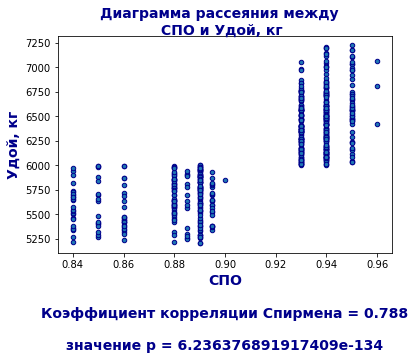

In [62]:
a=ferma_main
b='СПО'
c='Удой, кг'
corr_Spearman(a, b, c)

Статистический тест сообщает о высокой положительной корреляции со значением 0.788. Значение _p_ близко к нулю - это означает, что вероятность наблюдения данных при условии, что образцы не коррелированы очень маловероятна и то, что мы можем отвергнуть нулевую гипотезу, образцы не коррелированы.

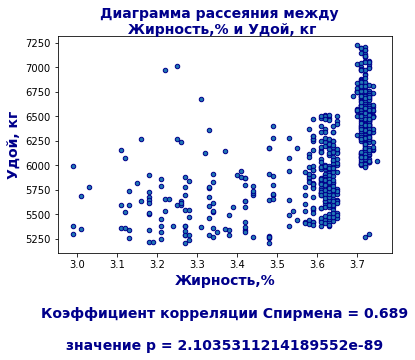

In [63]:
a=ferma_main
b='Жирность,%'
c='Удой, кг'
corr_Spearman(a, b, c)

Статистический тест сообщает о средней положительной корреляции со значением 0.689. Значение _p_ близко к нулю - это означает, что вероятность наблюдения данных при условии, что образцы не коррелированы очень маловероятна и то, что мы можем отвергнуть нулевую гипотезу, образцы не коррелированы.

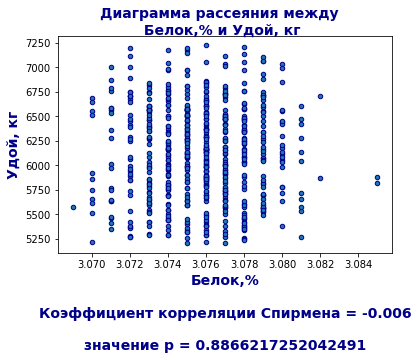

In [64]:
a=ferma_main
b='Белок,%'
c='Удой, кг'
corr_Spearman(a, b, c)

Статистический тест сообщает об очень слабой отрицательной корреляции со значением -0.006. Значение _p_ не близко к нулю - это означает, что вероятность наблюдения данных при условии, что образцы не коррелированы вероятна и то, что мы не можем отвергнуть нулевую гипотезу, образцы не коррелированы.

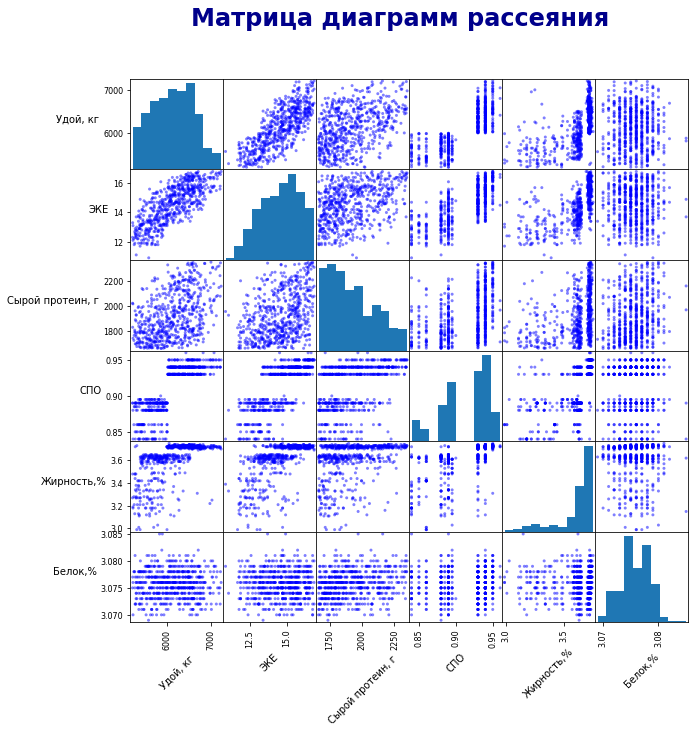

In [65]:
axes = pd.plotting.scatter_matrix(ferma_main[ferma_main.columns[ferma_main.columns != 'id']], figsize=(10, 10), color='blue')

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.suptitle('Матрица диаграмм рассеяния', fontsize=24, fontweight="bold", color='darkblue')
plt.show()

**Выводы:**

- Исследование показало, что связь целевого признака `Удой` молока линейная с признаками `ЭКЕ (Энергетическая кормовая единица)` и `Сырой протеин`;
- Связь целевого признака `Удой` молока с другими признаками не линейная;
- Мультиколинеарность не наблюдаем. Как правило, о мультиколлинеарности говорят при значении коэффициента корреляции от 0.9 до 0.95.

## Обучение модели линейной регрессии

Построим модель линейной регрессии на данных датасета `farm_main.csv`. Используем в качестве целевого признак `Удой`:

In [66]:
def func(a, b, c, d):   
    RANDOM_STATE = 42

    X = a.drop(b, axis=1)
    y = a[b]

    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        random_state=RANDOM_STATE)

    cat_col_names = c
    num_col_names = d

    encoder = OneHotEncoder(drop='first', sparse=False) 
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])

    encoder_col_names = encoder.get_feature_names()

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])

    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
     
    model_lr  = LinearRegression()
    model_lr.fit(X_train, y_train)
    
    predictions = model_lr.predict(X_test)
    
    return [X_train, X_test, y_train, y_test, predictions, encoder, scaler, model_lr]

In [67]:
def R2_LinearRegression(func, a, b, c, d):   
    func_n = func(a, b, c, d)
    r2_lr = r2_score(func_n[3], func_n[4])
   
    print('\u001b[38;5;19m', 'R\u00B2 LinearRegression = ',r2_lr,'\u001b[0m')

In [68]:
def MSE_LinearRegression(func, a, b, c, d):   
    func_n = func(a, b, c, d)
    mse = mean_squared_error(func_n[3], func_n[4])
   
    print('\u001b[38;5;19m', 'MSE LinearRegression = ',mse ,'\u001b[0m')

In [69]:
def MAE_LinearRegression(func, a, b, c, d):   
    func_n = func(a, b, c, d)
    mae = mean_absolute_error(func_n[3], func_n[4])
   
    print('\u001b[38;5;19m', 'MAE LinearRegression = ',mae,'\u001b[0m')

In [70]:
def RMSE_LinearRegression(func, a, b, c, d):   
    func_n = func(a, b, c, d)
    rmse = mean_squared_error(func_n[3], func_n[4], squared=False)
   
    print('\u001b[38;5;19m', 'RMSE LinearRegression = ',rmse ,'\u001b[0m')

In [71]:
def training_model(func, a, b, c, d):
    func_n = func(a, b, c, d)
    residuals = func_n[3] - func_n[4] 
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,8))
    axes[0].hist(residuals, bins=100, color = 'darkblue')
    axes[0].set_title('Гистограмма распределения остатков', fontsize=14, fontweight="bold", color='darkblue')
    axes[0].set_xlabel('Остатки', fontsize=14, fontweight="bold", color='darkblue')

    axes[1].scatter(x=func_n[4],  y=residuals, color = 'darkblue')
    axes[1].set_xlabel('Предсказания модели', fontsize=14, fontweight="bold", color='darkblue')
    axes[1].set_ylabel('Остатки', fontsize=14, fontweight="bold", color='darkblue')
    axes[1].set_title('Анализ дисперсии', fontsize=14, fontweight="bold", color='darkblue')
    plt.show()

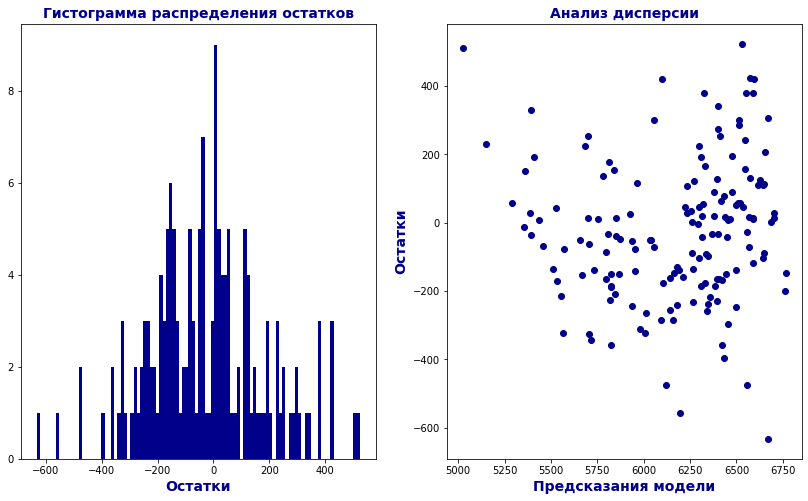

 R² LinearRegression =  0.7844078173416967 
 MSE LinearRegression =  43887.015009660514 
 MAE LinearRegression =  164.24194463474925 
 RMSE LinearRegression =  209.4922791170608 


In [72]:
a = ferma_main
b = 'Удой, кг'
c = ['Порода', 'Тип пастбища', 'Порода папы быка', 'Возраст']
d = ['ЭКЕ', 'Сырой протеин, г', 'СПО']
training_model(func, a, b, c, d)
R2_LinearRegression(func, a, b, c, d)
MSE_LinearRegression(func, a, b, c, d)
MAE_LinearRegression(func, a, b, c, d)
RMSE_LinearRegression(func, a, b, c, d)

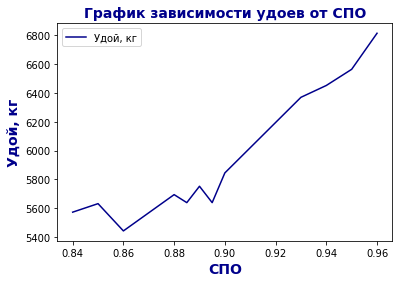

In [73]:
ferma_main.pivot_table(index='СПО', values='Удой, кг', aggfunc='median').plot(color = 'darkblue')
plt.xlabel('СПО', fontsize=14, fontweight="bold", color='darkblue')
plt.ylabel('Удой, кг', fontsize=14, fontweight="bold", color='darkblue')
plt.title('График зависимости удоев от СПО', fontsize=14, fontweight="bold", color='darkblue')
plt.show()

Рассматривая график зависимости целевого признака `Удой` от `СПО` определяем визуально, что значение 0.9 является границой нелинейности. Введем `СПО` в категориальный признак, имея ввиду полученное значение границы нелинейности.

In [74]:
cpo_mean = ferma_main['СПО'].mean()
ferma_main['СПО'] = ferma_main['СПО'].apply(lambda x: 1 if x > 0.9 else 0)

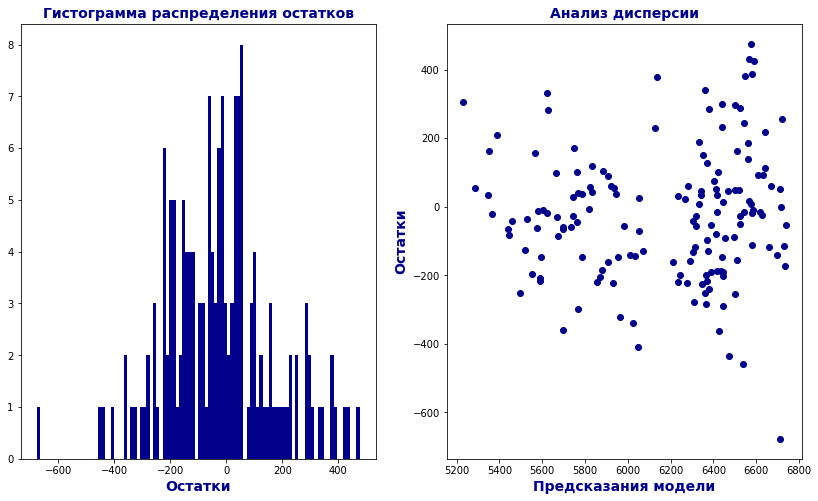

 R² LinearRegression =  0.8180879926867501 
 MSE LinearRegression =  37030.91131113695 
 MAE LinearRegression =  149.03965222364602 
 RMSE LinearRegression =  192.43417396901452 


In [75]:
ferma_main['ЭКЕ в квадрате'] = ferma_main['ЭКЕ']**2
a = ferma_main
b = 'Удой, кг'
c = ['Порода', 'Тип пастбища', 'Порода папы быка', 'Возраст', 'СПО']
d = ['ЭКЕ в квадрате', 'Сырой протеин, г']
training_model(func, a, b, c, d)
R2_LinearRegression(func, a, b, c, d)
MSE_LinearRegression(func, a, b, c, d)
MAE_LinearRegression(func, a, b, c, d)
RMSE_LinearRegression(func, a, b, c, d)

Построим модель линейной регрессии с учетом нового признака `Имя папы` из файла `ferma_dad.csv`:

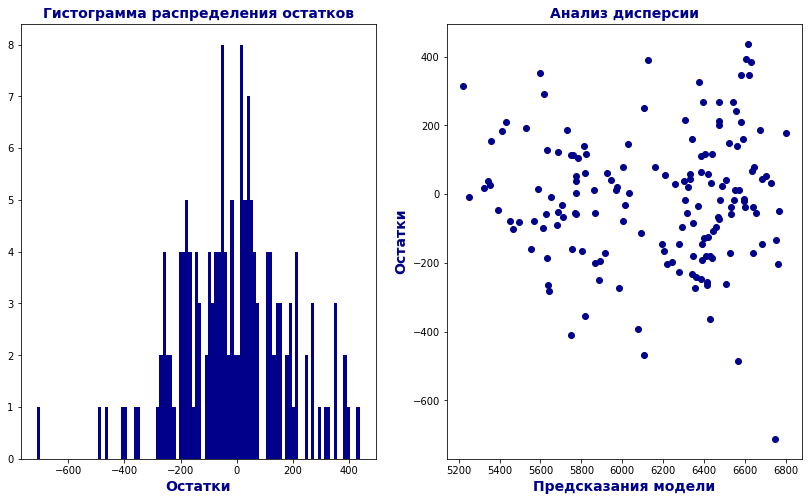

 R² LinearRegression =  0.8247542745210406 
 MSE LinearRegression =  35673.88988618195 
 MAE LinearRegression =  146.16302445362322 
 RMSE LinearRegression =  188.8753289505592 


In [76]:
ferma_main_dad = pd.merge(ferma_main, ferma_dad) 
a = ferma_main_dad
b = 'Удой, кг'
c = ['Порода', 'Тип пастбища', 'Порода папы быка', 'Возраст', 'СПО', 'Имя папы']
d = ['ЭКЕ в квадрате', 'Сырой протеин, г']
training_model(func, a, b, c, d)
R2_LinearRegression(func, a, b, c, d)
MSE_LinearRegression(func, a, b, c, d)
MAE_LinearRegression(func, a, b, c, d)
RMSE_LinearRegression(func, a, b, c, d)

Исследование показало, что, сопоставив значения _R²_ последняя модель является более точной. Значение _R²_ = 0.82, что ближе к единице. Анализ данных других метрик _MSE, MAE, RMSE_ демонстрируют минимальное их значение в этой модели.

In [77]:
print('95% доверительный интервал =', st.norm.interval(confidence=0.95, loc=np.mean(ferma_main_dad['Удой, кг']), scale=st.sem(ferma_main_dad['Удой, кг'])))

95% доверительный интервал = (6088.750859988463, 6163.185445744021)


In [78]:
cow_buy['ЭКЕ'] = ferma_main['ЭКЕ'].mean()*1.05
cow_buy['ЭКЕ в квадрате'] = cow_buy['ЭКЕ']**2
cow_buy['Сырой протеин, г'] = ferma_main['Сырой протеин, г'].mean()*1.05
cow_buy['СПО'] = cpo_mean*1.05
cow_buy['Удой, кг'] = 0
cow_buy['Возраст'] = 'менее_2_лет'
cow_buy['СПО'] = cow_buy['СПО'].apply(lambda x: 1 if x > 0.9 else 0)
cow_buy['Возраст'] = cow_buy['Возраст'].apply(lambda x: 1 if x == 'Более 2 лет' else 0)
display(cow_buy)

,Порода,Тип пастбища,Порода папы быка,Имя папы,"Жирность,%","Белок,%",ЭКЕ,ЭКЕ в квадрате,"Сырой протеин, г",СПО,"Удой, кг",Возраст
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,15.276162,233.361138,2019.947532,1,0,0
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,15.276162,233.361138,2019.947532,1,0,0
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,15.276162,233.361138,2019.947532,1,0,0
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,15.276162,233.361138,2019.947532,1,0,0
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,15.276162,233.361138,2019.947532,1,0,0
5,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.63,3.053,15.276162,233.361138,2019.947532,1,0,0
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,15.276162,233.361138,2019.947532,1,0,0
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,15.276162,233.361138,2019.947532,1,0,0
8,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,15.276162,233.361138,2019.947532,1,0,0
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079,15.276162,233.361138,2019.947532,1,0,0


In [79]:
ferma_main_dad['Возраст'] = ferma_main_dad['Возраст'].apply(lambda x: 1 if x == 'Более 2 лет' else 0)
ferma_main_dad.head()

,id,"Удой, кг",ЭКЕ,"Сырой протеин, г",СПО,Порода,Тип пастбища,Порода папы быка,"Жирность,%","Белок,%",Вкус молока,Возраст,ЭКЕ в квадрате,Имя папы
0,1,5863,14.2,1743,0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,1,201.64,Буйный
1,2,5529,12.8,2138,0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,0,163.84,Соловчик
2,3,5810,14.0,1854,0,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,1,196.00,Барин
3,4,5895,12.4,2012,0,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,1,153.76,Буйный
4,5,5302,12.8,1675,0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,0,163.84,Барин


Применив лучшую по качеству и по точности модель к данным из датасета `cow_buy_old.csv` мы спрогнозируем удой бурёнок которых фермер хочет приобрести у "Экофермы".

In [80]:
X_train = ferma_main_dad
X_test = cow_buy

target = 'Удой, кг'
cat_col_names = ['Порода', 'Тип пастбища', 'Порода папы быка', 'Возраст', 'СПО', 'Имя папы']
num_col_names = ['ЭКЕ в квадрате', 'Сырой протеин, г']


X = X_train.drop(target, axis=1)
y = X_train[target]

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False) 
X_ohe = encoder.fit_transform(X[cat_col_names])

encoder_col_names = encoder.get_feature_names() 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[num_col_names])

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)

X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X = pd.concat([X_ohe, X_scaled], axis=1)
                  
model_lr  = LinearRegression()
model_lr.fit(X, y) 

X = X_test.drop(target, axis=1)
y = X_test[target]

X_ohe = encoder.transform(X[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_scaled = scaler.transform(X[num_col_names])

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X_cow = pd.concat([X_ohe, X_scaled], axis=1)   

predictions = model_lr.predict(X_cow)

cow_buy = cow_buy.reset_index(drop=True)

for i in range(len(cow_buy['Удой, кг'])):
    cow_buy.loc[i,'Удой, кг'] = predictions[i]

display(cow_buy.sort_values(by = 'Удой, кг', ascending = False))  

,Порода,Тип пастбища,Порода папы быка,Имя папы,"Жирность,%","Белок,%",ЭКЕ,ЭКЕ в квадрате,"Сырой протеин, г",СПО,"Удой, кг",Возраст
11,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.73,3.073,15.276162,233.361138,2019.947532,1,6370.5,0
17,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.77,3.053,15.276162,233.361138,2019.947532,1,6370.5,0
5,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.63,3.053,15.276162,233.361138,2019.947532,1,6370.5,0
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,15.276162,233.361138,2019.947532,1,6364.5,0
15,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.065,15.276162,233.361138,2019.947532,1,6364.5,0
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079,15.276162,233.361138,2019.947532,1,6364.5,0
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,15.276162,233.361138,2019.947532,1,6359.5,0
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,15.276162,233.361138,2019.947532,1,6359.5,0
12,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,15.276162,233.361138,2019.947532,1,6359.5,0
18,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.34,3.069,15.276162,233.361138,2019.947532,1,6319.5,0


In [81]:
cow_buy.sort_values (by = ['Удой, кг'], ascending = False).loc[cow_buy['Удой, кг'] >= 6000]

,Порода,Тип пастбища,Порода папы быка,Имя папы,"Жирность,%","Белок,%",ЭКЕ,ЭКЕ в квадрате,"Сырой протеин, г",СПО,"Удой, кг",Возраст
11,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.73,3.073,15.276162,233.361138,2019.947532,1,6370.5,0
17,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.77,3.053,15.276162,233.361138,2019.947532,1,6370.5,0
5,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.63,3.053,15.276162,233.361138,2019.947532,1,6370.5,0
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,15.276162,233.361138,2019.947532,1,6364.5,0
15,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.065,15.276162,233.361138,2019.947532,1,6364.5,0
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079,15.276162,233.361138,2019.947532,1,6364.5,0
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,15.276162,233.361138,2019.947532,1,6359.5,0
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,15.276162,233.361138,2019.947532,1,6359.5,0
12,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,15.276162,233.361138,2019.947532,1,6359.5,0
18,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.34,3.069,15.276162,233.361138,2019.947532,1,6319.5,0


**Выводы:**

- Построены модели линейной регрессии на данных датасета `farm_main.csv` и определена по значениям метрик более точная;
- Получено значение коэффициента детерминации R² = 0.82, которое ближе к единице в более точной модели;
- Применена лучшая по качеству и по точности модель к данным из датасета `cow_buy_old.csv` и получен прогноз удоя бурёнок;
- Определен прогноз бурёнок с ассоциации пастбищ "ЭкоФерма" с удоем не менее 6000 кг в год.

## Обучение модели логистической регрессии

Построим модель логистической регрессии на данных датасета `farm_main.csv` используя в качестве целевого признак `Вкус молока`.
Построим матрицу ошибок

In [82]:
ferma_main['Возраст'] = ferma_main['Возраст'].apply(lambda x: 1 if x == 'Более 2 лет' else 0)
ferma_main['Вкус молока'] = ferma_main['Вкус молока'].apply(lambda x: 1 if x == 'вкусно' else 0)
cow_buy['Вкус молока'] = 0

 Accuracy =  0.6242038216560509 
 Precision =  0.6198347107438017 
 Recall =  0.8522727272727273 


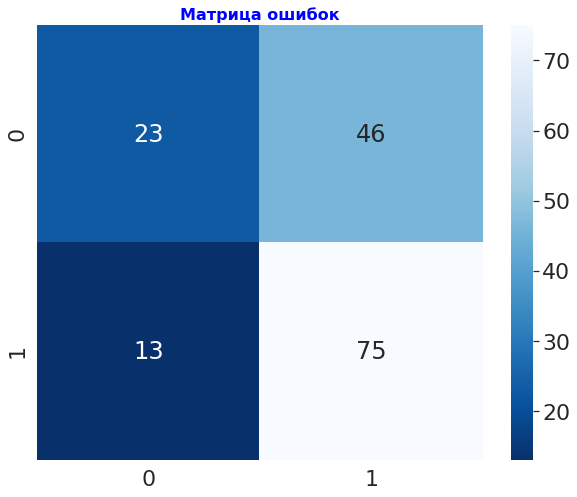

In [83]:
a = ferma_main
b = 'Вкус молока'
c = ['Порода', 'Тип пастбища', 'Порода папы быка', 'Возраст']
d = ['ЭКЕ', 'Сырой протеин, г', 
     'СПО', 'Жирность,%' , 'Белок,%']

RANDOM_STATE = 42

X = a.drop(b, axis=1)
y = a[b]

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

cat_col_names = c
num_col_names = d

encoder = OneHotEncoder(drop='first', sparse=False) 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names() 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = LogisticRegression()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)       

plt.figure(figsize = (10,8))
cm = confusion_matrix(y_test, y_pred)

sns.set (font_scale= 2 )
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');
plt.title('Матрица ошибок', fontsize=16, fontweight="bold", color='blue')
print('\u001b[38;5;19m', 'Accuracy = ',acc,'\u001b[0m')
print('\u001b[38;5;19m', 'Precision = ',precision,'\u001b[0m')
print('\u001b[38;5;19m', 'Recall = ',recall,'\u001b[0m')

Проведенный анализ показал, что значение Recall=0.85 больше Precision=0.62. Критичнее всего при покупке коров ложно-положительная ошибка. Сейчас модель допускает ошибку первого рода в 46 случаях. 

Рассчитаем метрики для случая, когда критическая ошибка будет равна 0.

In [84]:
a = ferma_main
b = 'Вкус молока'
c = ['Порода', 'Тип пастбища', 'Порода папы быка', 'Возраст']
d = ['ЭКЕ', 'Сырой протеин, г', 
     'СПО', 'Жирность,%' , 'Белок,%']

RANDOM_STATE = 42

X = a.drop(b, axis=1)
y = a[b]

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

cat_col_names = c
num_col_names = d

encoder = OneHotEncoder(drop='first', sparse=False) 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names() 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = LogisticRegression()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)  

y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba, y_pred), columns = ['y_valid', 'y_proba', 'y_pred']).sort_values(by='y_proba',ascending=False)

display(data) 

,y_valid,y_proba,y_pred
66,1,0.835375,1
85,1,0.834565,1
51,1,0.831855,1
110,1,0.824944,1
146,1,0.814454,1
...,...,...,...
23,1,0.310728,0
144,0,0.293429,0
119,0,0.284055,0
141,0,0.280745,0


In [85]:
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 2000,endpoint=False)]

In [86]:
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>= i else 0)

display(data.head())

,y_valid,y_proba,y_pred,y_pred_0.1,y_pred_0.11,y_pred_0.12,y_pred_0.13,y_pred_0.14,y_pred_0.15,y_pred_0.16,...,y_pred_0.91,y_pred_0.92,y_pred_0.93,y_pred_0.94,y_pred_0.95,y_pred_0.96,y_pred_0.97,y_pred_0.98,y_pred_0.99,y_pred_1.0
66,1,0.835375,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
85,1,0.834565,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
51,1,0.831855,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
110,1,0.824944,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
146,1,0.814454,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [87]:
for i in thresholds:
    cm = confusion_matrix(y_test, data['y_pred_'+str(i)])
    if cm[0][1] == 0:
        print('\u001b[38;5;19m', 'Порог = ',i ,'Precision = ', round(precision_score(y_test, data['y_pred_'+str(i)]), 2), 'TP =', cm[1][1])
        porog = i
        break

 Порог =  0.83 Precision =  1.0 TP = 3


 Accuracy =  0.46 
 Precision =  1.0 
 Recall =  0.03 


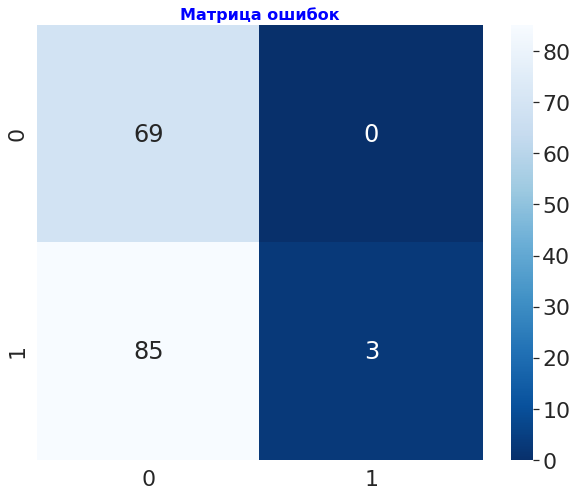

In [88]:
acc = round(accuracy_score(y_test, data['y_pred_'+str(porog)]), 2)
precision = round(precision_score(y_test, data['y_pred_'+str(porog)]), 2)
recall = round(recall_score(y_test, data['y_pred_'+str(porog)]), 2)

plt.figure(figsize = (10,8))
cm = confusion_matrix(y_test, data['y_pred_'+str(porog)])

sns.set (font_scale= 2 )
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');
plt.title('Матрица ошибок', fontsize=16, fontweight="bold", color='blue')
print('\u001b[38;5;19m', 'Accuracy = ',acc,'\u001b[0m')
print('\u001b[38;5;19m', 'Precision = ',precision,'\u001b[0m')
print('\u001b[38;5;19m', 'Recall = ',recall,'\u001b[0m')

In [89]:
X_train = ferma_main_dad
X_test = cow_buy

target = 'Вкус молока'
cat_col_names = ['Порода', 'Тип пастбища', 'Порода папы быка', 'Возраст']
num_col_names = ['ЭКЕ', 'Сырой протеин, г', 
     'СПО', 'Жирность,%' , 'Белок,%']

X = X_train.drop(target, axis=1)
y = X_train[target]

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_ohe = encoder.fit_transform(X[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[num_col_names])

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)

X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X = pd.concat([X_ohe, X_scaled], axis=1)
                  
clf = LogisticRegression()
clf = clf.fit(X, y)

X = X_test.drop(target, axis=1)
y = X_test[target]

X_ohe = encoder.transform(X[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_scaled = scaler.transform(X[num_col_names])

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X_cow = pd.concat([X_ohe, X_scaled], axis=1)   

y_pred = clf.predict_proba(X_cow)[:,1] 

cow_buy['y_pred'] = y_pred

cow_buy['Вкус молока'] = cow_buy['y_pred'].apply(lambda x: 'вкусно' if x > porog else 'не вкусно')      
cow_buy['Возраст'] = cow_buy['Возраст'].apply(lambda x: 'более 2 лет' if x == 1 else 'менее 2 лет')

cow_buy = cow_buy.sort_values(by = ['y_pred'], ascending = False)
cow_buy = cow_buy.drop(columns='y_pred') 

display(cow_buy)

,Порода,Тип пастбища,Порода папы быка,Имя папы,"Жирность,%","Белок,%",ЭКЕ,ЭКЕ в квадрате,"Сырой протеин, г",СПО,"Удой, кг",Возраст,Вкус молока
17,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.77,3.053,15.276162,233.361138,2019.947532,1,6370.5,менее 2 лет,вкусно
5,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.63,3.053,15.276162,233.361138,2019.947532,1,6370.5,менее 2 лет,вкусно
12,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,15.276162,233.361138,2019.947532,1,6359.5,менее 2 лет,вкусно
10,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,15.276162,233.361138,2019.947532,1,6138.0,менее 2 лет,не вкусно
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,15.276162,233.361138,2019.947532,1,6364.5,менее 2 лет,не вкусно
18,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.34,3.069,15.276162,233.361138,2019.947532,1,6319.5,менее 2 лет,не вкусно
11,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.73,3.073,15.276162,233.361138,2019.947532,1,6370.5,менее 2 лет,не вкусно
15,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.065,15.276162,233.361138,2019.947532,1,6364.5,менее 2 лет,не вкусно
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,15.276162,233.361138,2019.947532,1,6085.5,менее 2 лет,не вкусно
8,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,15.276162,233.361138,2019.947532,1,6085.5,менее 2 лет,не вкусно


Наблюдаем, что при пороге 0.83, нулевое значение критической ошибки 1-го рода FP. При этом значение равное 3 принимает количество истинно-положительного результата.

Самое оптимальное значение порога — 0.83. При минимальном значении критической ошибки мы получаем 3 коровы как количество истинно-положительного результата целевого признака `Вкус молока`.

Покажем список коров с ассоциации пастбищ "ЭкоФерма" с признаком по вкусу молока "вкусно":

In [90]:
cow_buy.loc[cow_buy['Вкус молока'] == 'вкусно']

,Порода,Тип пастбища,Порода папы быка,Имя папы,"Жирность,%","Белок,%",ЭКЕ,ЭКЕ в квадрате,"Сырой протеин, г",СПО,"Удой, кг",Возраст,Вкус молока
17,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.77,3.053,15.276162,233.361138,2019.947532,1,6370.5,менее 2 лет,вкусно
5,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.63,3.053,15.276162,233.361138,2019.947532,1,6370.5,менее 2 лет,вкусно
12,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,15.276162,233.361138,2019.947532,1,6359.5,менее 2 лет,вкусно


## Итоговые выводы

Имея ввиду полученные ранее данные с коровами по годовому удою выше 6000 кг и с признаком по вкусу молоко "вкусно" объеденим эти данные:

In [91]:
cow_buy.sort_values (by = ['Удой, кг'], ascending = False).loc[(cow_buy['Удой, кг'] >= 6000) & 
                                                               (cow_buy['Вкус молока'] == 'вкусно')]

,Порода,Тип пастбища,Порода папы быка,Имя папы,"Жирность,%","Белок,%",ЭКЕ,ЭКЕ в квадрате,"Сырой протеин, г",СПО,"Удой, кг",Возраст,Вкус молока
17,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.77,3.053,15.276162,233.361138,2019.947532,1,6370.5,менее 2 лет,вкусно
5,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.63,3.053,15.276162,233.361138,2019.947532,1,6370.5,менее 2 лет,вкусно
12,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,15.276162,233.361138,2019.947532,1,6359.5,менее 2 лет,вкусно


**Проведенный анализ показал, что 3 бурёнки удовлетворяют требованиями фермера для их приобретения.**

- В процессе обучения модели линейной ригреесси и построения более точной модели, мы воспользовались добавлением нового признака. Перевели `СПО` в категориальный признак, выявив и использовав границу нелинейности. Ввели новый признак `ЭКЕ в квадрате`. Данная модель была более точной, чем предыдущая.
- Далее дополнительно ввели в категориальный признак `Имя папы`. Данная модель показала максимальную точность. На основе этой модели построили прогноз по удоям буренок ассоциации пастбищ "ЭкоФерма".
- Построили модель логистической регрессии на данных датасета `farm_main.csv`. Получили данные по целевому признаку `Вкус молока`. Выявили список коров со вкусным молоком.
- Объеденили полученняе данные и выявили перечень из 3 коров с удовлетворяющими для заказчика требованиями по удоям годовых более 6000 кг и со вкусным молоком.
- Самое оптимальное значение порога — 0.83. При минимальном значении критической ошибки мы получаем 3 коровы как количество истинно-положительного результата целевого признака `Вкуса молока`.
- Фермер, учитывая свои требования к объему удоев и качеству молока, может купить 3 коровы из стада с минимальным риском для себя.